In [ ]:
import numpy as np
import gzip, os
from urllib.request import urlretrieve
from random import random
from math import exp
from random import seed
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Overview
Uses PyTorch to train neural networks for the tasks of image classification and image segemntation.






# Training an Image Classifier





CIFAR10 dataset will be used to train an image classifier.

![](https://miro.medium.com/max/578/1*BCsHErqOJxmKDLQXYJR_ow.png)



In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


images min=-1.0 max=1.0


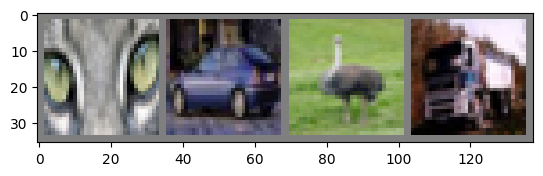

cat   car   bird  truck


In [ ]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
print(f"images min={images.min()} max={images.max()}")
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

##Code

###Convolutional Neural Network

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        """
          Add layers to your neural net.
        """
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        """
          Forward pass:
            Apply layers you defined in __init__() to RGB input
            layers: Conv2d --> ReLU --> MaxPool2d --> Conv2d --> ReLU --> MaxPool2d --> Flatten --> Linear --> ReLU --> Linear --> ReLU --> Linear
        """
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

###Loss function and optimizer

Uses a Classification Cross-Entropy loss and SGD with momentum.

In [ ]:
criterion = nn.CrossEntropyLoss() # YOUR CODE HERE: Add loss function
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)# YOUR CODE HERE: Add optimizer

###Train the network

Loop over data iterator, and feed the inputs to the network and optimize.

In [ ]:
epochs = 15
losses = []
accuracies = []
for epoch in range(epochs):
    batches = 0
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Optimize / update parameters
        optimizer.step()

        batches += 1

        p1, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print stats
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    epoch_loss = running_loss / batches
    losses.append(epoch_loss)

    epoch_accuracy = 100 * correct / total
    accuracies.append(epoch_accuracy)

print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

[1,  2000] loss: 2.113
[1,  4000] loss: 1.730
[1,  6000] loss: 1.553
[1,  8000] loss: 1.447
[1, 10000] loss: 1.383
[1, 12000] loss: 1.307
[2,  2000] loss: 1.188
[2,  4000] loss: 1.134
[2,  6000] loss: 1.105
[2,  8000] loss: 1.087
[2, 10000] loss: 1.081
[2, 12000] loss: 1.042
[3,  2000] loss: 0.919
[3,  4000] loss: 0.935
[3,  6000] loss: 0.909
[3,  8000] loss: 0.886
[3, 10000] loss: 0.893
[3, 12000] loss: 0.870
[4,  2000] loss: 0.770
[4,  4000] loss: 0.782
[4,  6000] loss: 0.752
[4,  8000] loss: 0.787
[4, 10000] loss: 0.767
[4, 12000] loss: 0.782
[5,  2000] loss: 0.662
[5,  4000] loss: 0.660
[5,  6000] loss: 0.691
[5,  8000] loss: 0.681
[5, 10000] loss: 0.689
[5, 12000] loss: 0.680
[6,  2000] loss: 0.540
[6,  4000] loss: 0.576
[6,  6000] loss: 0.587
[6,  8000] loss: 0.601
[6, 10000] loss: 0.627
[6, 12000] loss: 0.608
[7,  2000] loss: 0.459
[7,  4000] loss: 0.522
[7,  6000] loss: 0.532
[7,  8000] loss: 0.525
[7, 10000] loss: 0.540
[7, 12000] loss: 0.547
[8,  2000] loss: 0.408
[8,  4000] 

###Testing network on the test data


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# no gradients needed during test phase
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 68.1 %
Accuracy for class: car   is 84.9 %
Accuracy for class: bird  is 59.3 %
Accuracy for class: cat   is 53.8 %
Accuracy for class: deer  is 70.6 %
Accuracy for class: dog   is 53.7 %
Accuracy for class: frog  is 83.5 %
Accuracy for class: horse is 74.2 %
Accuracy for class: ship  is 81.7 %
Accuracy for class: truck is 75.5 %


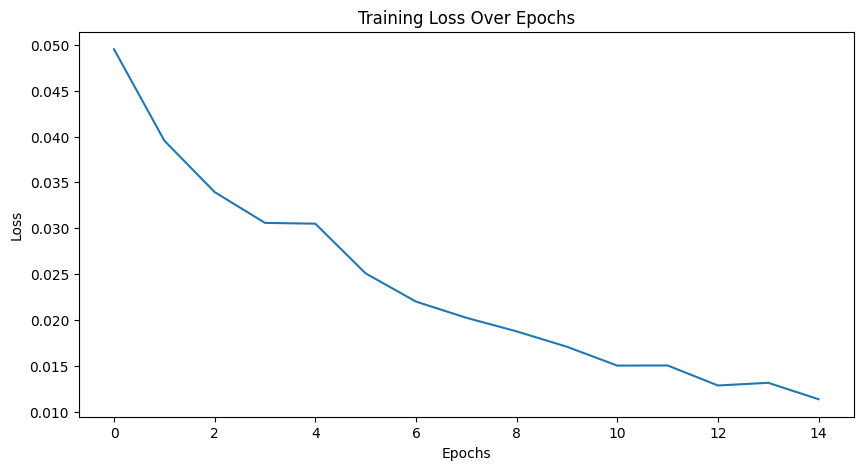

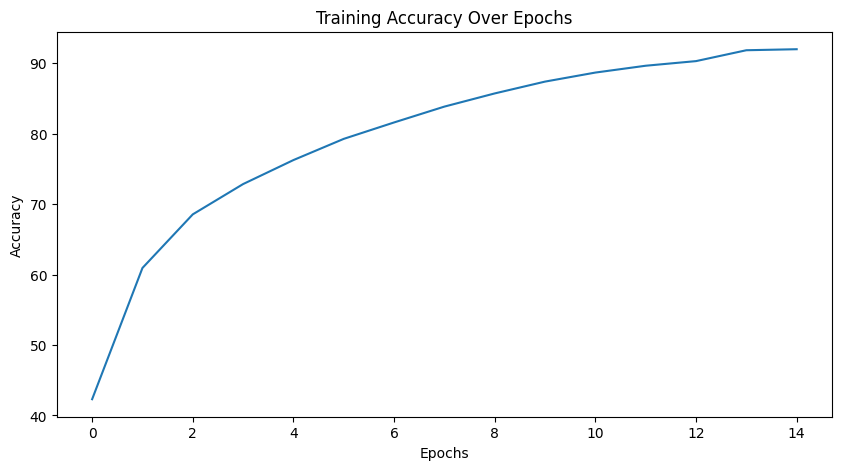

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(accuracies, label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Semantic Segmentation

## Overview
**Semantic Segmentation** is an image analysis task in which we **classify** ***each pixel*** in the image into a class.

In [ ]:
import os
import tarfile
import shutil
import urllib.request

url='http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar'
path='VOC'
def get_archive(path,url):
  try:
    os.mkdir(path)
  except:
    path=path

  filename='devkit'
  urllib.request.urlretrieve(url,f"{path}/{filename}.tar")

get_archive(path,url)
def extract(path):
  tar_file=tarfile.open(f"{path}/devkit.tar")
  tar_file.extractall('./')
  tar_file.close()
  shutil.rmtree(path)

extract(path)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models
import torchvision.transforms as T
import numpy as np

"""Various RGB palettes for coloring segmentation labels."""

VOC_COLORMAP = [
    [0, 0, 0],
    [224, 224, 192],
    [128, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 192, 0],
    [0, 64, 128],
]

# Categories that correspond to each color above
VOC_CLASSES = [
    "background",
    "edge",
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "potted plant",
    "sheep",
    "sofa",
    "train",
    "tv/monitor",
]

## Code

In [ ]:
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class VocDataset(Dataset):
  def __init__(self, dir, color_map):
    self.root = os.path.join(dir,'VOCdevkit/VOC2007')
    self.images_dir = os.path.join(self.root,'JPEGImages')
    self.target_dir = os.path.join(self.root,'SegmentationClass') # ground truth?
    file_list = os.path.join(self.root,'ImageSets/Segmentation/trainval.txt')
    self.files = [line.rstrip() for line in open(file_list, "r")]
    self.color_map = color_map
    self.transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
    self.seg_transform = transforms.Compose([transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.NEAREST)])

  def __len__(self):
    return len(self.files)

  def colors_to_seg_map(self, seg_RGB):
    """
      Converts [R, G, B] color channels of RGB segmentation maps (from dataset)
      to binary segmentation map of shape (n_classes, H, W), where n_classes
      is the number of distinct classes/colors present in  RGB segmentation map.

    """
    h, w = seg_RGB.shape[:2]
    seg_map = np.zeros((h, w), dtype=np.int64)
    for i, c in enumerate(self.color_map):
        match = np.all(seg_RGB == np.array(c, dtype=np.uint8), axis=-1)
        seg_map[match] = i
    return seg_map

  def __getitem__(self, index):
    name = self.files[index] + '.jpg'
    seg_im_name = self.files[index] + '.png'
    image = Image.open(os.path.join(self.images_dir, name)).convert('RGB')
    seg_im = Image.open(os.path.join(self.target_dir, seg_im_name)).convert('RGB')
    image = self.transform(image)
    seg_im = self.seg_transform(seg_im)
    seg_map = self.colors_to_seg_map(np.array(seg_im))

    return image, torch.from_numpy(seg_map).long()

#### Build the FCN-32 model

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class FCN32(torch.nn.Module):
  def __init__(self, n_classes):
    super().__init__()

    # Pretrained VGG-16 features (first half of NN)
    vgg16 = models.vgg16(weights='VGG16_Weights.DEFAULT')
    features = list(vgg16.features.children())
    self.vgg_features = nn.Sequential(*features)
    self.n_class = n_classes

    """
      Perform upsampling via deconvolution operations
    """
    self.upsample = nn.ConvTranspose2d(512, n_classes, kernel_size=64, stride=32, padding=16, bias=False)

  def forward(self, x):
    """
      Similar to what you did in Part 1, apply layers you defined in __init__()
      to RGB input to perform the forward pass.
    """
    # YOUR CODE HERE
    x = self.vgg_features(x)
    x = self.upsample(x)
    return x

In [ ]:
import torch.optim as optim

model = FCN32(n_classes=len(VOC_CLASSES))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_dataset = VocDataset(dir='', color_map=VOC_COLORMAP)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 10:.3f}')
            running_loss = 0.0

print('Finished Training')



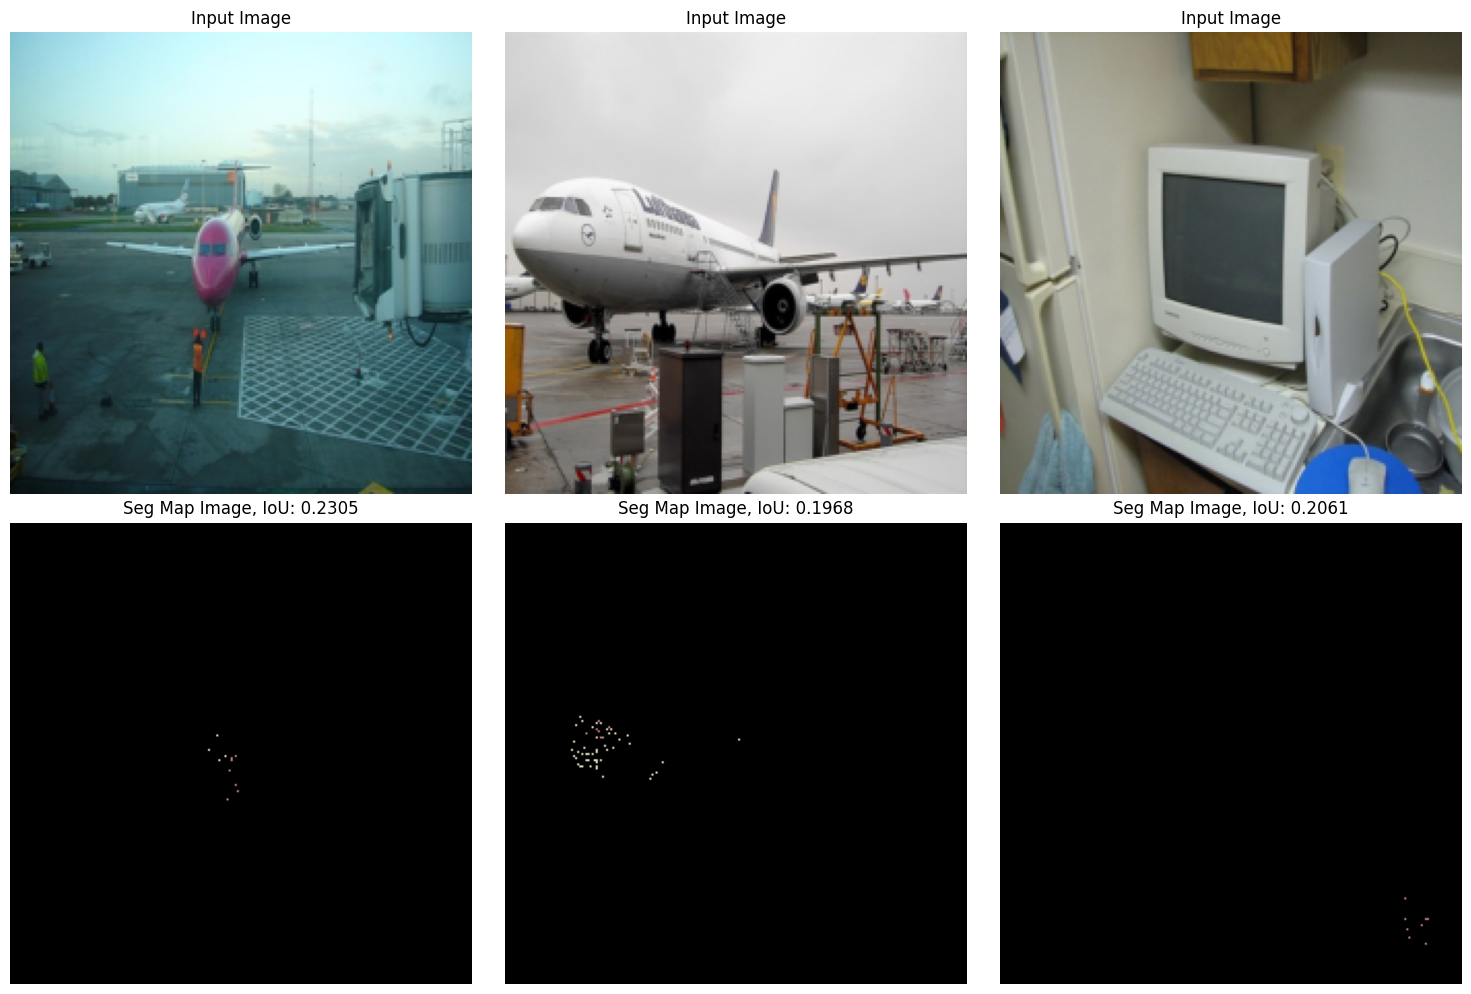

Average Mean IoU : 0.2111


In [ ]:
data = VocDataset(dir='', color_map=VOC_COLORMAP)
loader = DataLoader(data, batch_size=1, shuffle=False)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def segmap_helper(image):
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    labels = np.array(VOC_COLORMAP)

    for l in range(22):
        i = image == l
        r[i] = labels[l, 0]
        g[i] = labels[l, 1]
        b[i] = labels[l, 2]

    ret = np.stack([r, g, b], axis=2)
    return ret

def mean_iou(target, prediction):
    iou_l = []
    for i in range(22):
        target_i = (target == i)
        pred_i = (prediction == i)
        c1 = (target_i & pred_i).sum().item()
        c2 = (target_i | pred_i).sum().item()
        if c2 != 0:
            iou_l.append(c1 / c2)
    return sum(iou_l) / len(iou_l)

total_iou = 0
num_images = 3
plt.figure(figsize=(15, 10))

for i, (inputs, labels) in enumerate(loader):
    if i >= num_images:
        break
    inputs, labels = inputs.to(device), labels.to(device)
    with torch.no_grad():
        outputs = model(inputs)
        predictions = outputs.argmax(dim=1)

    input_im = inputs[0].cpu().numpy().transpose(1, 2, 0)
    output_im = segmap_helper(predictions[0].cpu().numpy())
    iou_val = mean_iou(labels[0].cpu(), predictions[0].cpu())
    total_iou += iou_val

    plt.subplot(2, 3, i + 1)
    plt.imshow(input_im)
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(2, 3, i + 4)
    plt.imshow(output_im)
    plt.title(f'Seg Map Image, IoU: {iou_val:.4f}')
    plt.axis('off')


plt.tight_layout()
plt.show()

print(f'Average Mean IoU : {total_iou / num_images:.4f}')
